In [14]:
import pandas as pd
diab=pd.read_csv("/Users/zoyasyed/Downloads/PML_Module5/Lab Files/Module 1/diabetic_data.csv")
admis=pd.read_csv("/Users/zoyasyed/Downloads/PML_Module5/Lab Files/Module 1/admissions_mapping.csv")
def clean_admission(df):
    df['admission_type_description']=['unknown' if((x in ['Not Available', 'Not Mapped', 'NULL'])|pd.isnull(x)) else x for x in df['admission_type_description']]
    return df


In [15]:
clean_admission(admis)

,admission_type_id,admission_type_description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,unknown
5,6,unknown
6,7,Trauma Center
7,8,unknown


In [16]:
joined_data=pd.merge(diab, admis, on='admission_type_id', how='left')
joined_data.head(5)
joined_data.fillna(0)
df=joined_data
df['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

In [17]:
def create_map():
    ## List of tuples with name and number of repititons.
    name_list = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    ## Loop over the tuples to create a dictionary to map codes 
    ## to the names.
    out_dict = {}
    count = 1
    for name, num in name_list:
        for i in range(num):
          out_dict.update({str(count): name})  
          count += 1
    return out_dict
  

def map_codes(df, codes):
    import pandas as pd
    col_names = df.columns.tolist()
    for col in col_names:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 

def azureml_main(df):
    col_list = ['diag_1', 'diag_2', 'diag_3']
    codes = create_map()
    df[col_list] = map_codes(df[col_list], codes)
    return df

In [18]:
azureml_main(df)


/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,unknown
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Emergency
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,Emergency
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,Emergency
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,Urgent


In [19]:
df['diag_3']

0              unknown
1            endocrine
2         supplemental
3          circulatory
4            endocrine
              ...     
101761     circulatory
101762     ill-defined
101763          mental
101764          injury
101765     ill-defined
Name: diag_3, Length: 101766, dtype: object

In [20]:
def set_readmit_class(x):
    return ['0' if (y == 'NO') else '1' for y in x]

def azureml_main(df):
    df['readmitted'] = set_readmit_class(df['readmitted'])
    return df
#df['readmitted'] = df['readmitted'].apply(lambda x: 'NO' if x =='NO' else 'YES')
azureml_main(df)



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,0,unknown
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,1,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,0,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,0,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,0,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,1,Emergency
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,0,Emergency
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,0,Emergency
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,0,Urgent


In [21]:

df['readmitted'].value_counts()
df['readmitted'] = df['readmitted'].astype(int)


In [22]:
from scipy.stats import zscore
col_list=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
df[col_list]=df[col_list].apply(zscore)



In [23]:
df[col_list]
y=df['readmitted']

In [24]:
def diabetes_bar(df):   
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
   
    
## Create a series of bar plots for the various levels of the
## string columns in the data frame by readmi_class. 
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.readmitted == 1, col].value_counts()
            temp0 = df.loc[df.readmitted == 0, col].value_counts() 
        
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1)
            ax1.set_title('Values of ' + col + '\n for readmitted patients')
            temp0.plot(kind = 'bar', ax = ax0)
            ax0.set_title('Values of ' + col + '\n for patients not readmitted')
            
            
    return 'Done'





/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting

'Done'

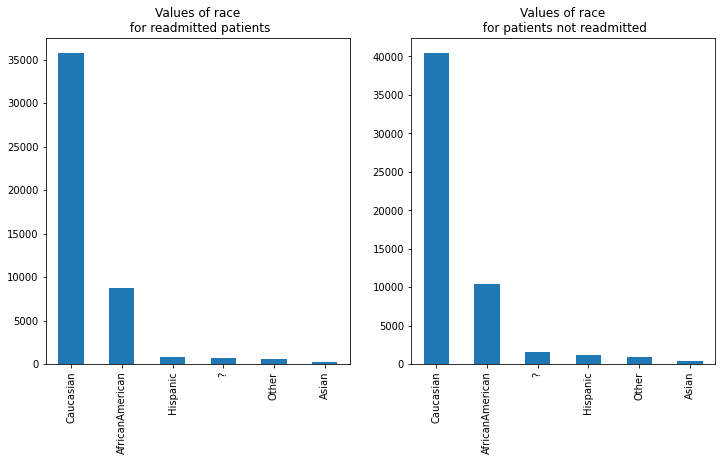

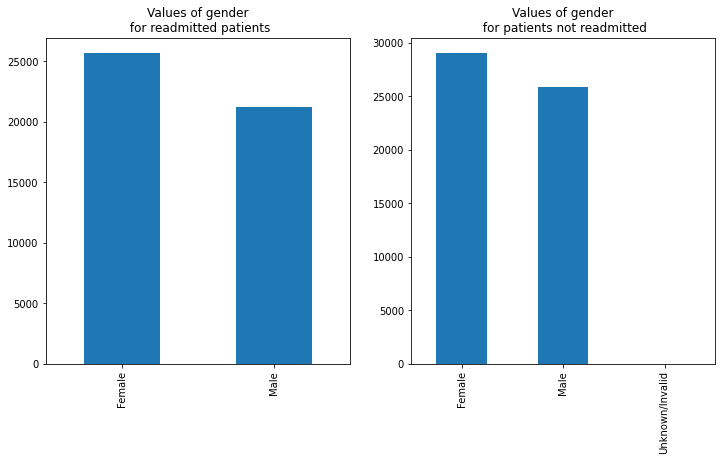

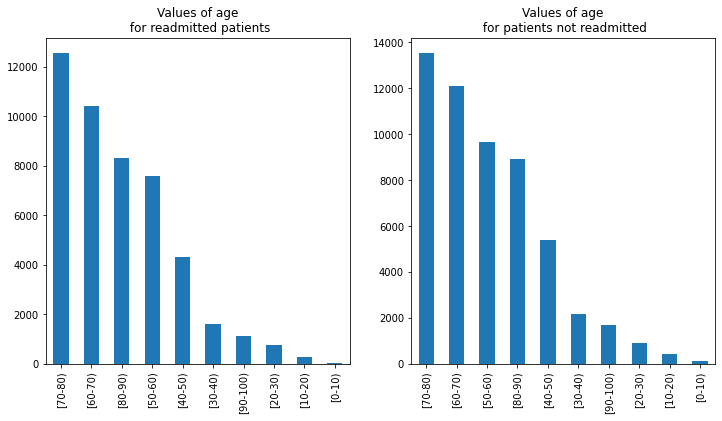

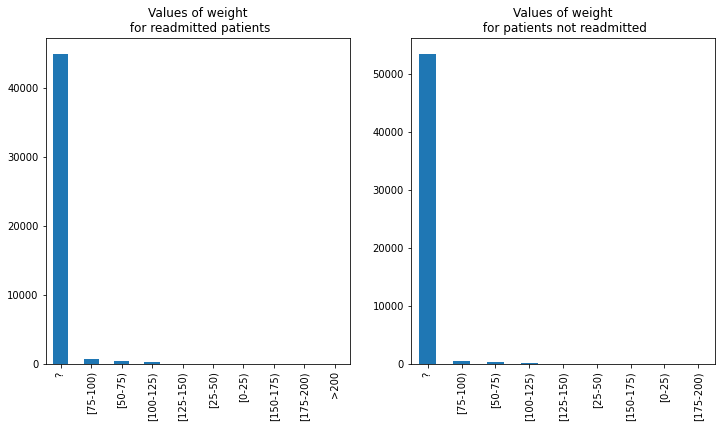

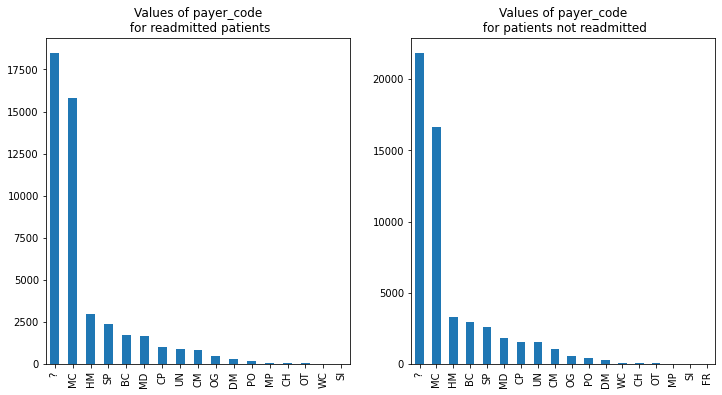

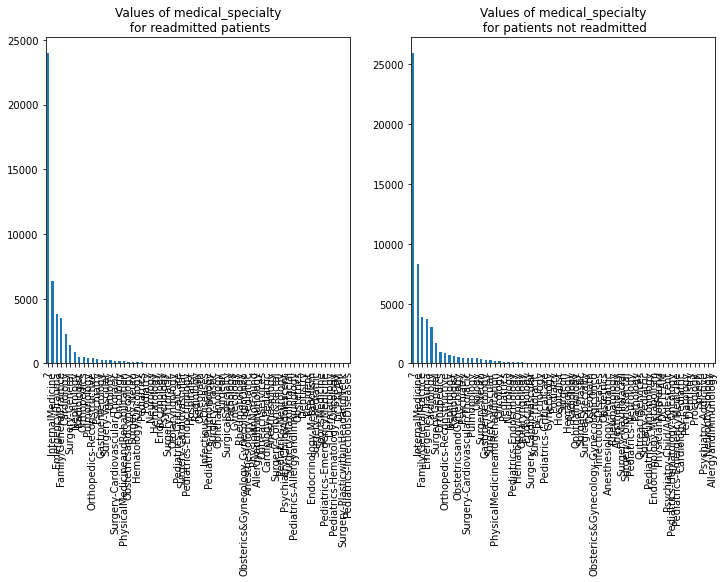

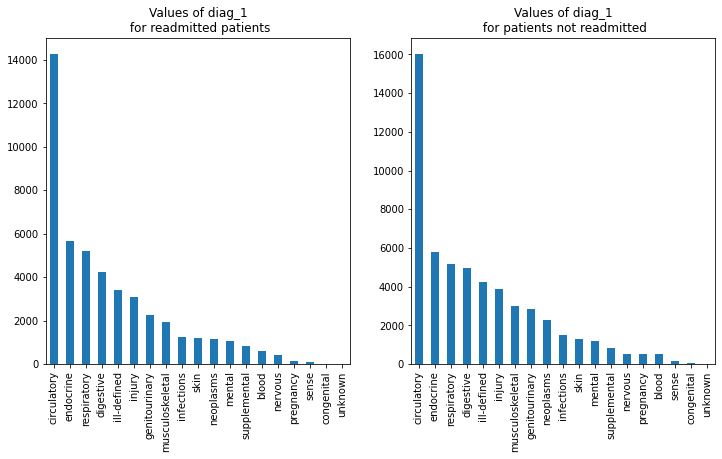

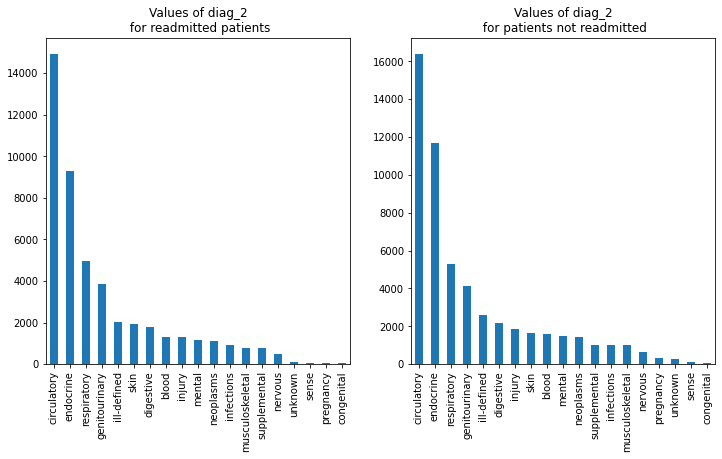

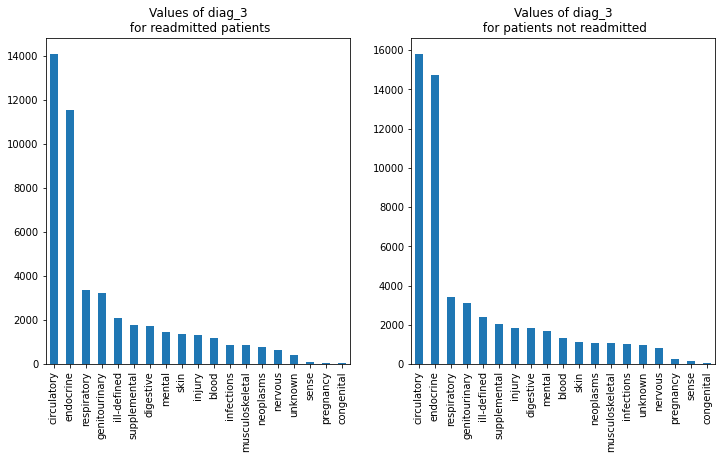

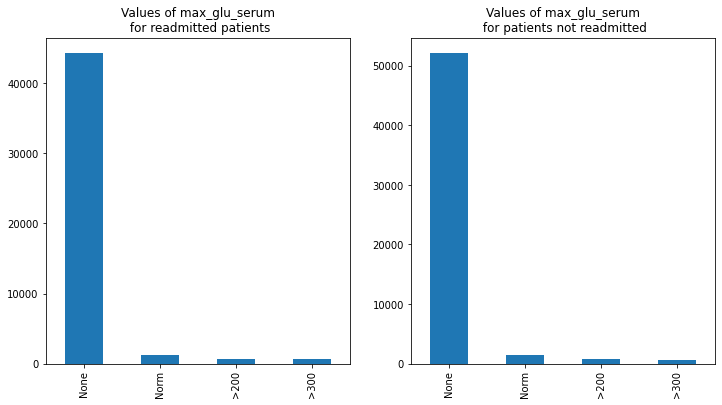

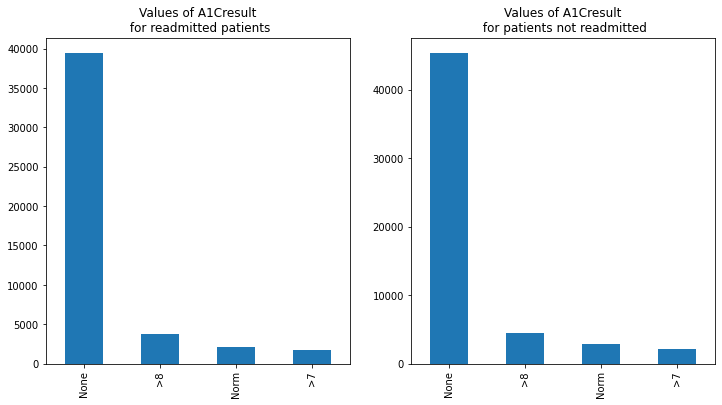

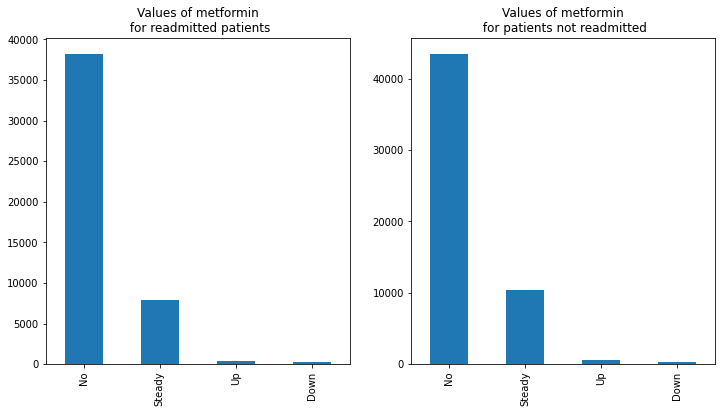

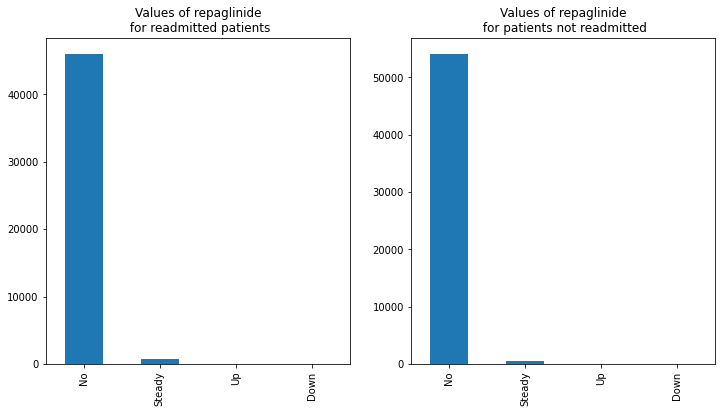

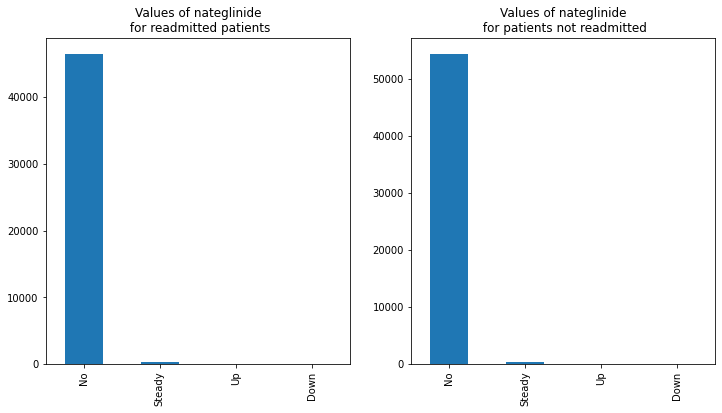

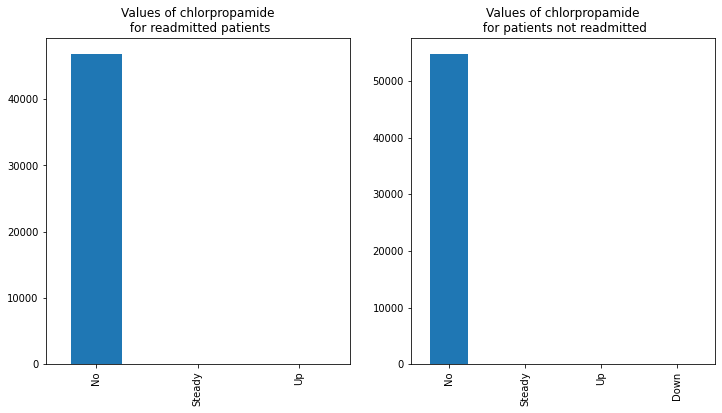

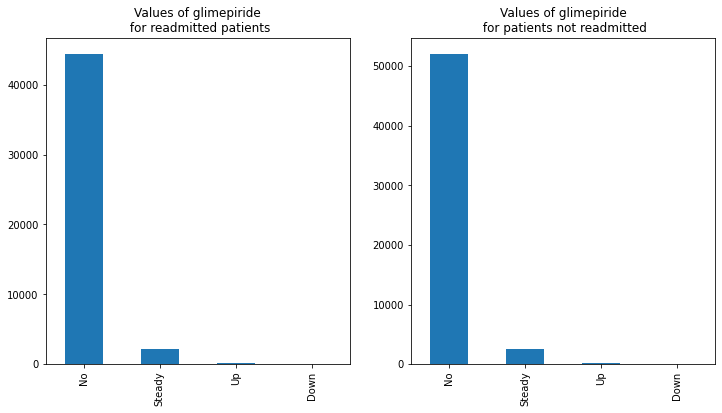

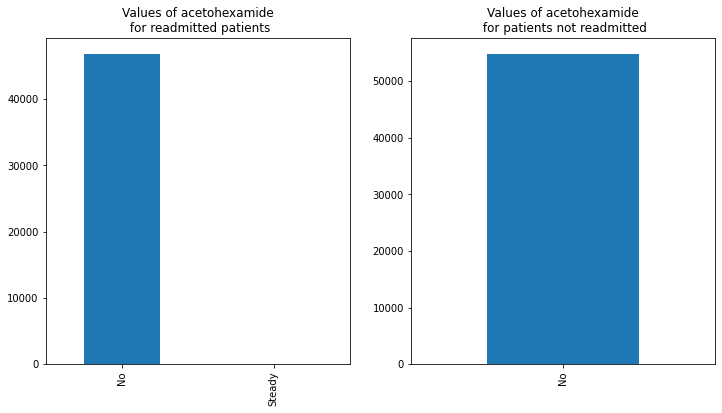

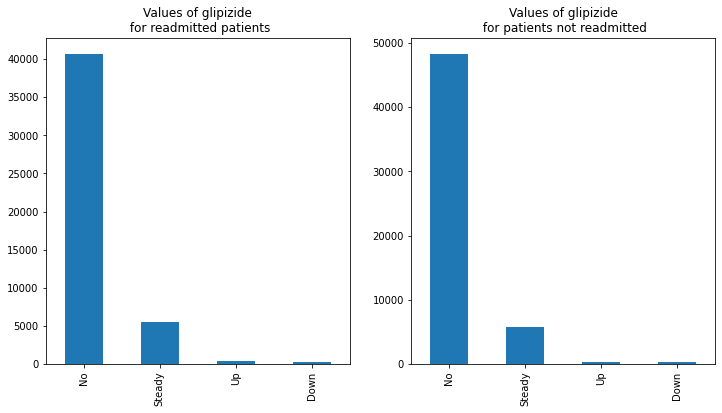

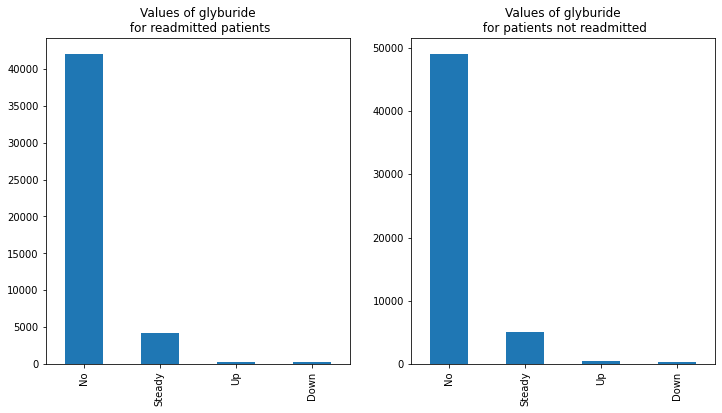

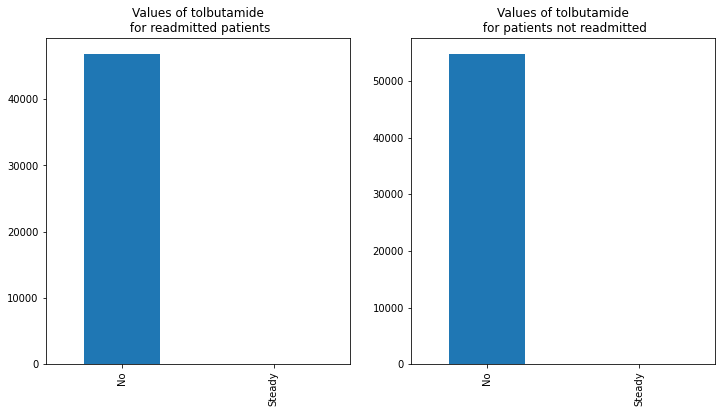

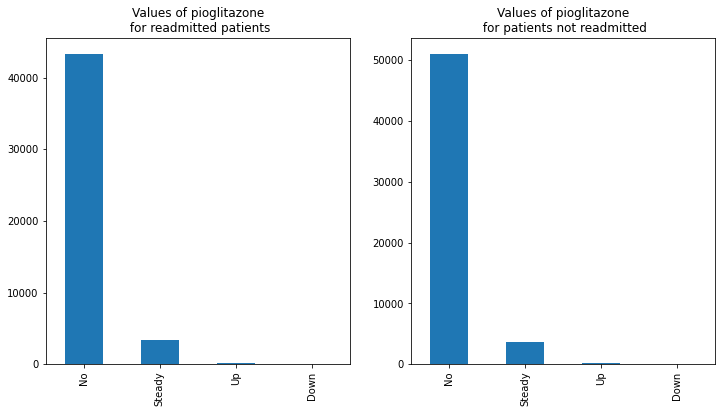

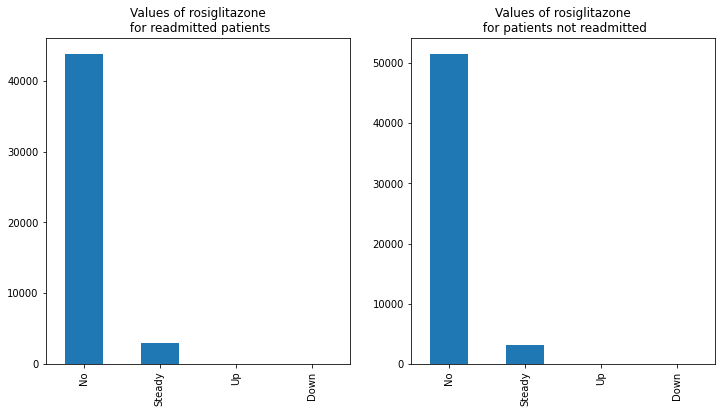

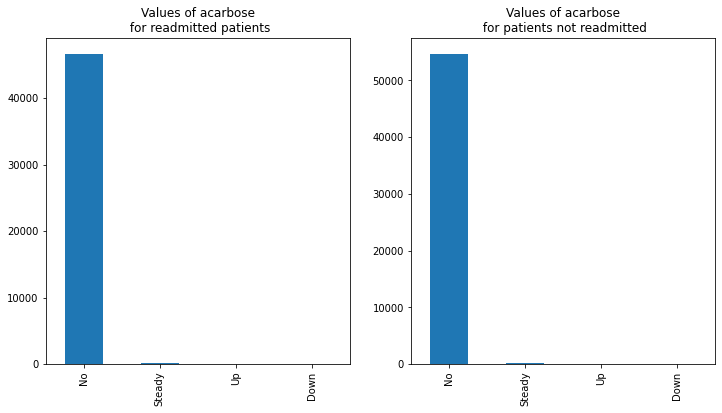

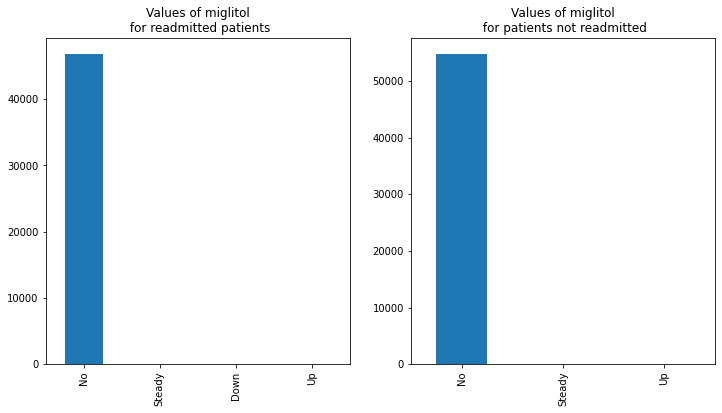

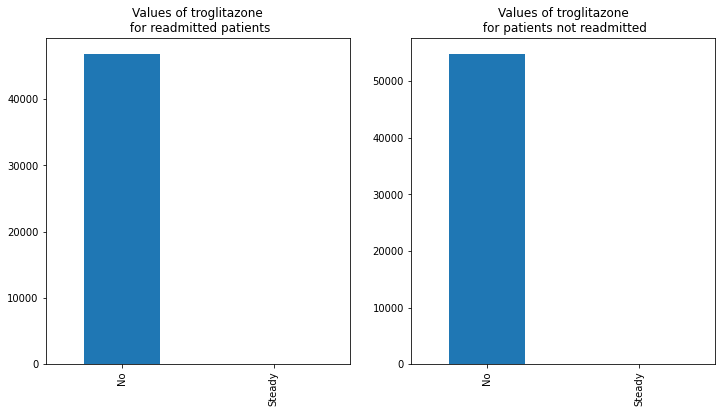

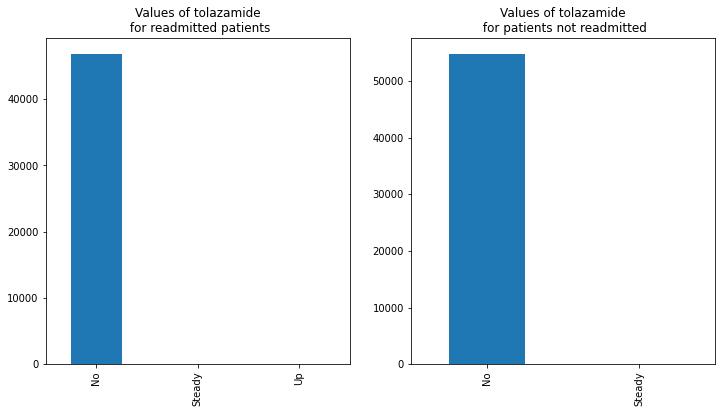

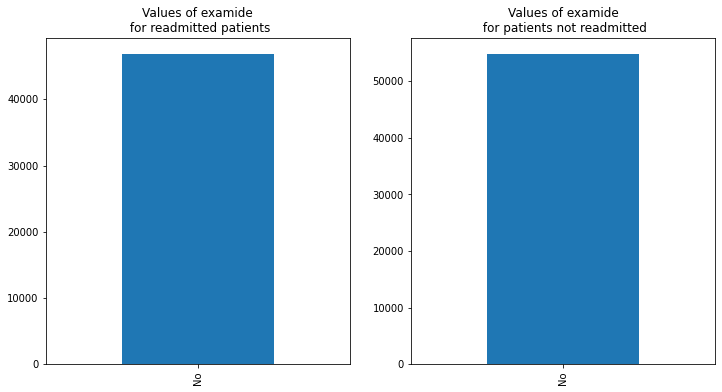

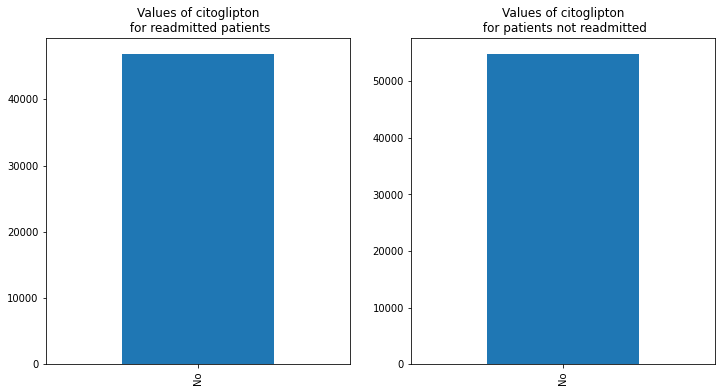

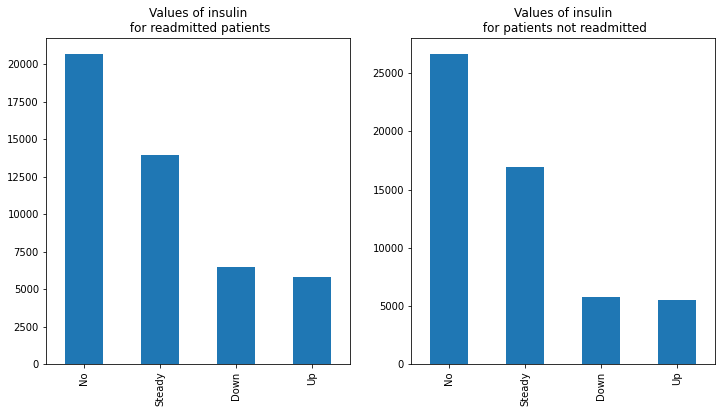

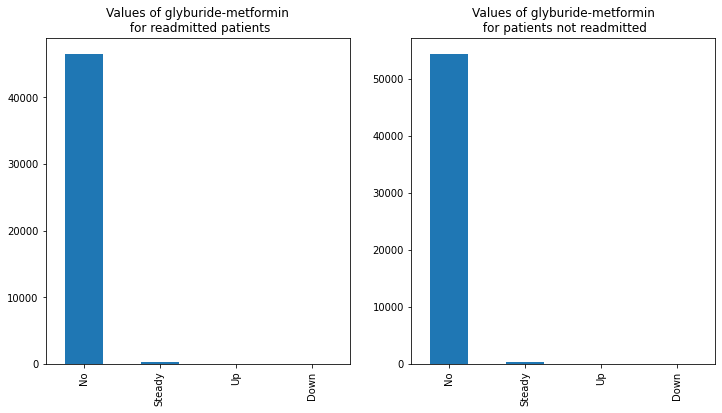

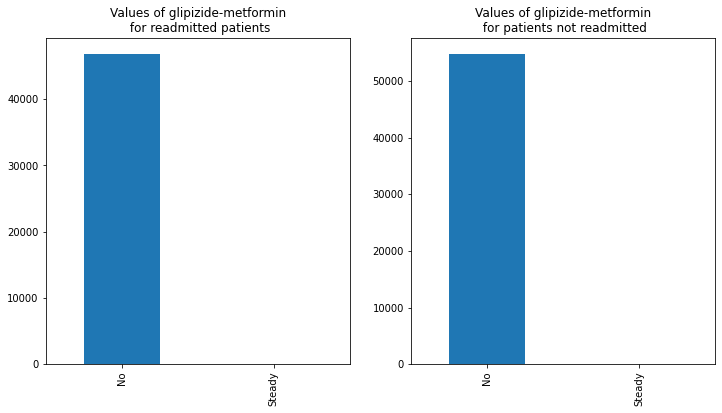

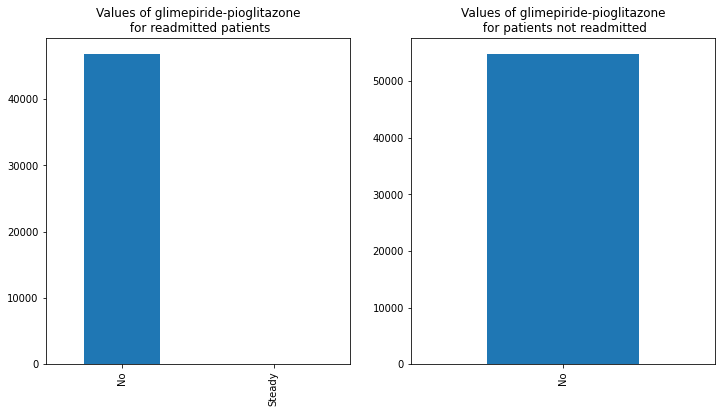

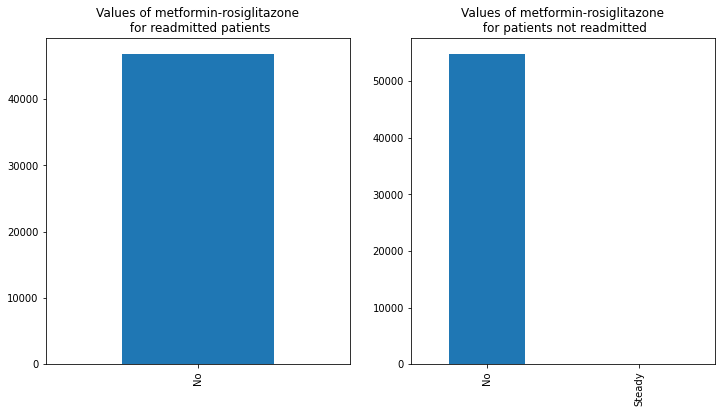

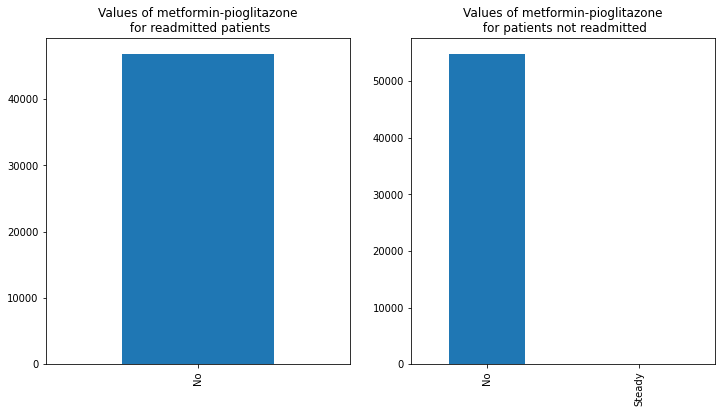

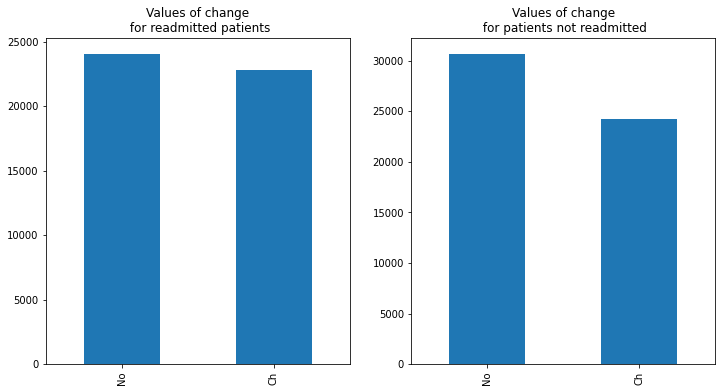

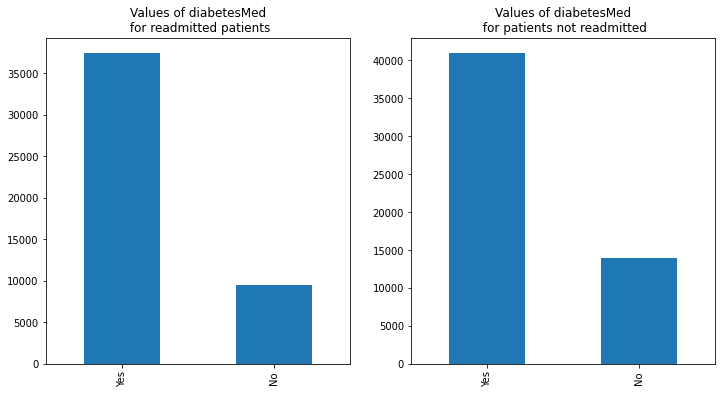

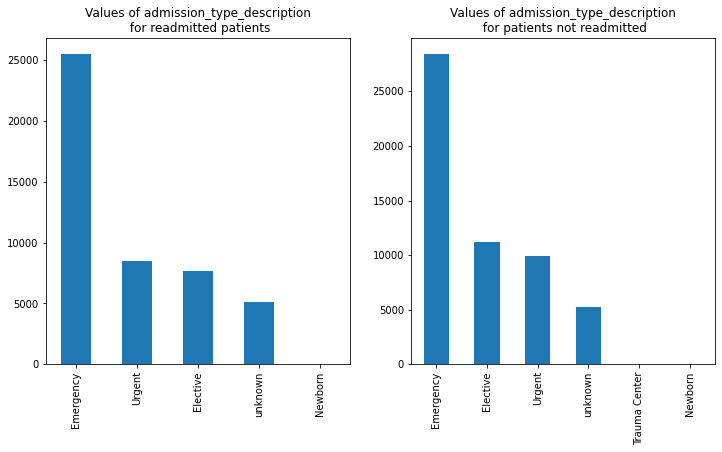

In [25]:
diabetes_bar(df)
   

In [26]:
def diabetes_box(df):
    import matplotlib
   
    import numpy as np
    import matplotlib.pyplot as plt
    
## Now make some box plots of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.readmitted == 1, col]
            temp0 = df.loc[df.readmitted == 0, col]  
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.boxplot(temp1.to_numpy())
            ax1.set_title('Box plot of ' + col + '\n for readmitted patients')
            ax0.boxplot(temp0.to_numpy())
            ax0.set_title('Box plot of ' + col + '\n for patients not readmitted')
            #fig.savefig('box_' + col + '.png')

    return 'Done'
    


'Done'

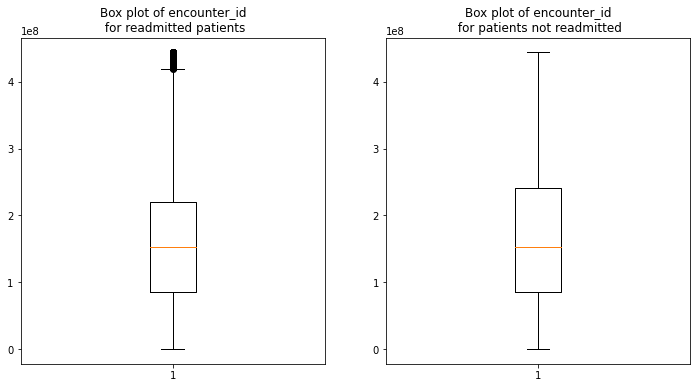

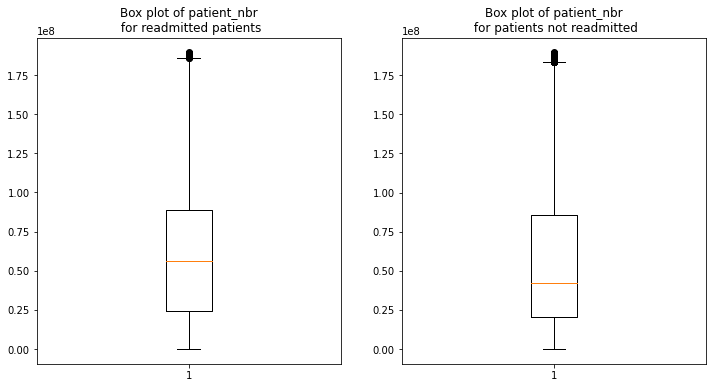

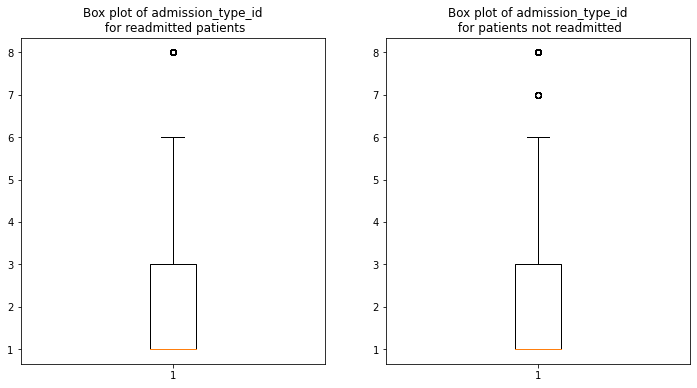

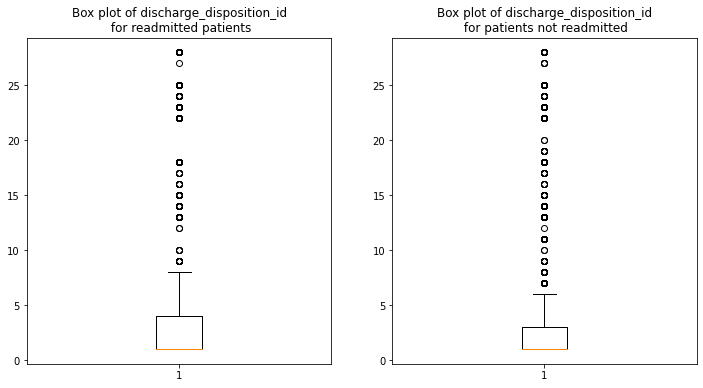

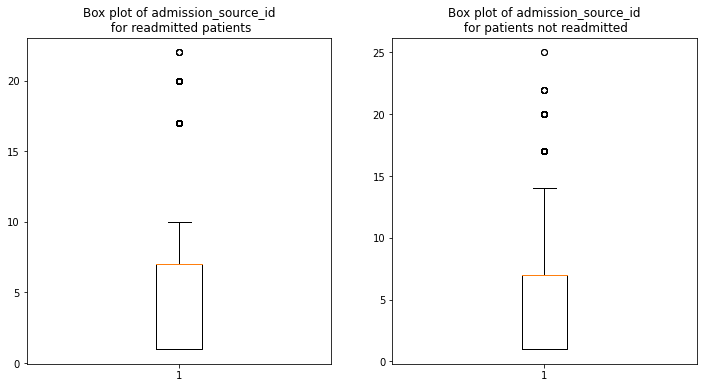

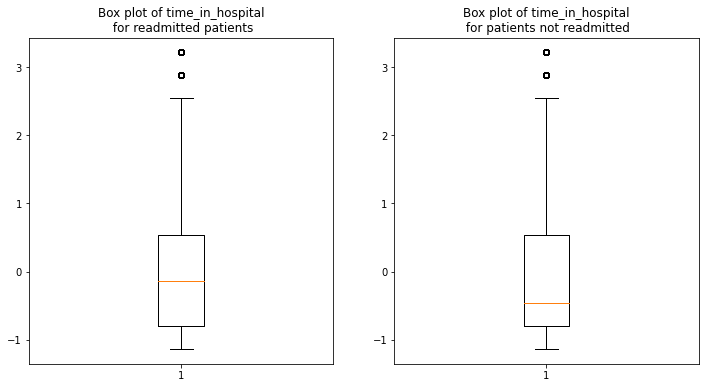

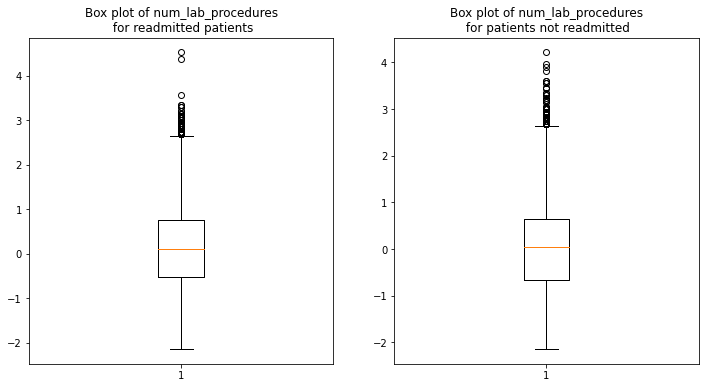

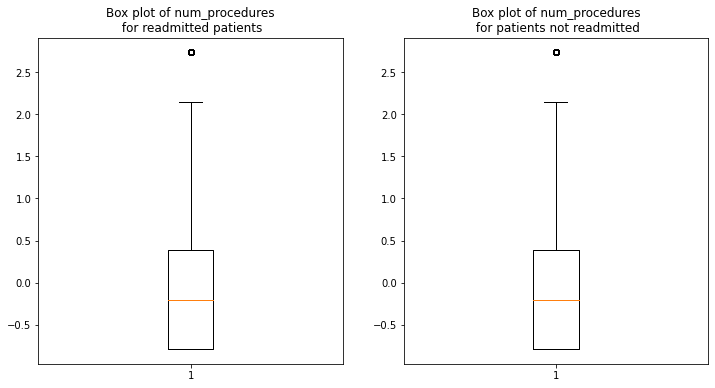

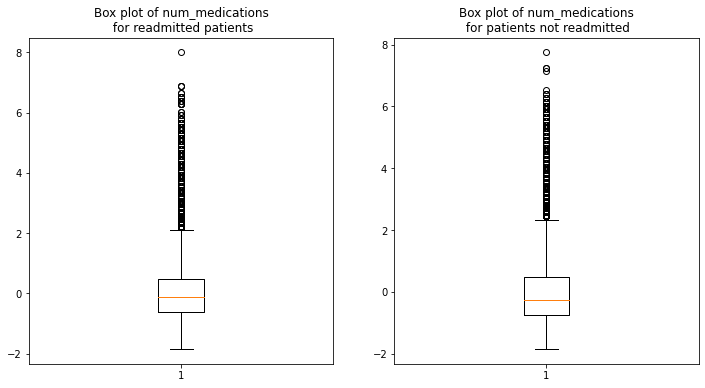

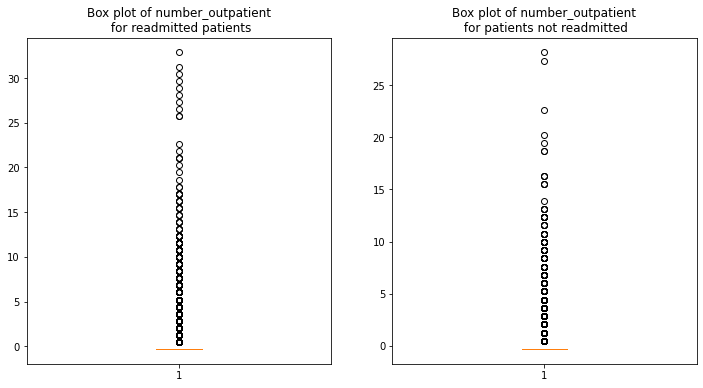

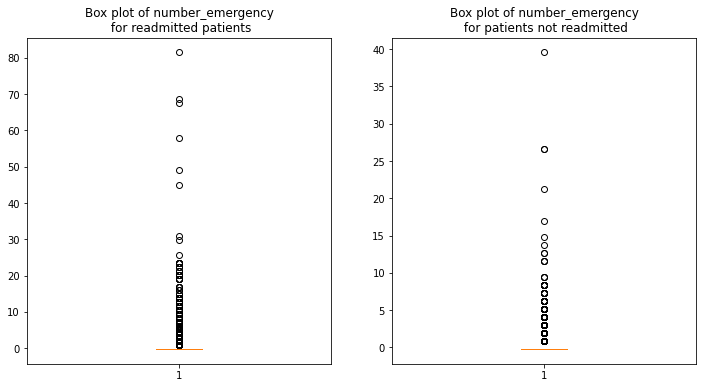

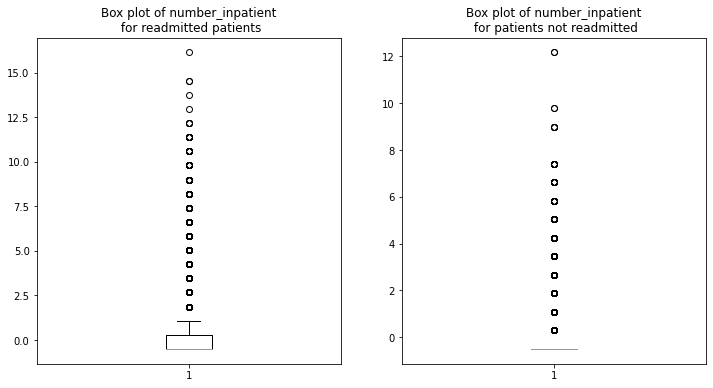

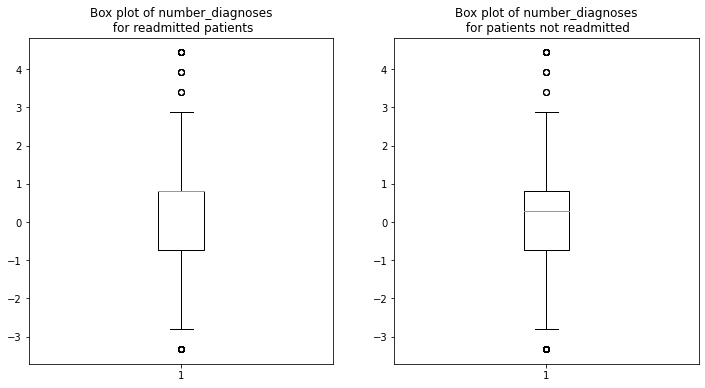

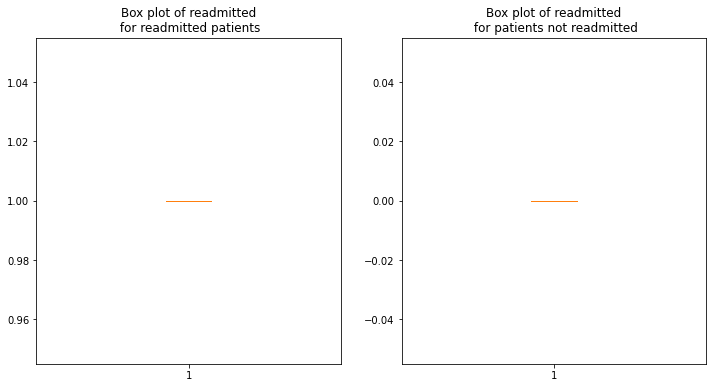

In [27]:
 diabetes_box(df)

In [28]:
def diabetes_hist(df):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
## Now make historgrams of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.readmitted == 1, col]
            temp0 = df.loc[df.readmitted == 0, col]  
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.hist(temp1.to_numpy(), bins = 30)
            ax1.set_title('Histogram of ' + col + '\n for readmitted patients')
            ax0.hist(temp0.to_numpy(), bins = 30)
            ax0.set_title('Histogram of ' + col + '\n for patients not readmitted')
            #fig.savefig('hist_' + col + '.png')

    return 'Done'

'Done'

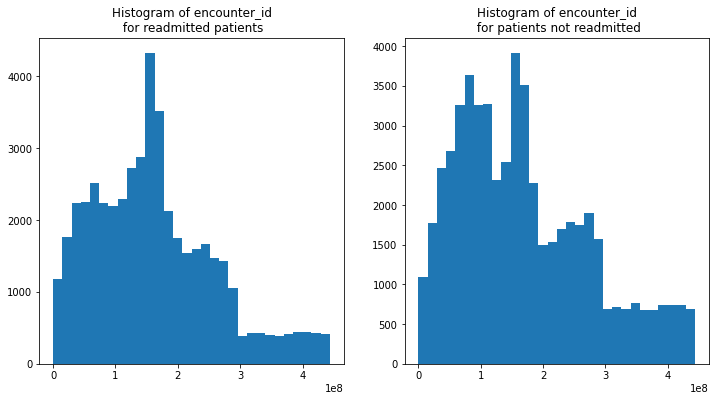

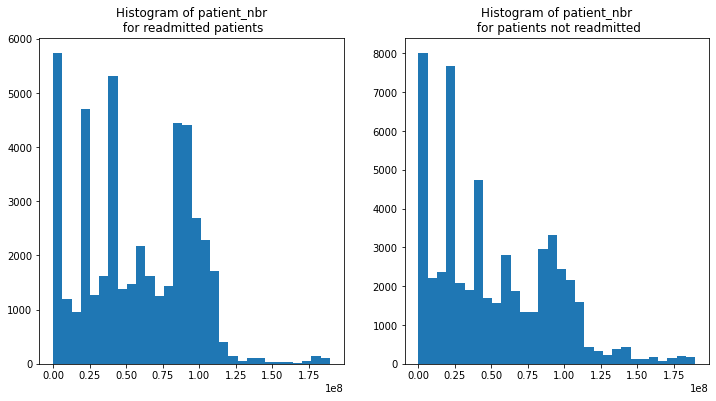

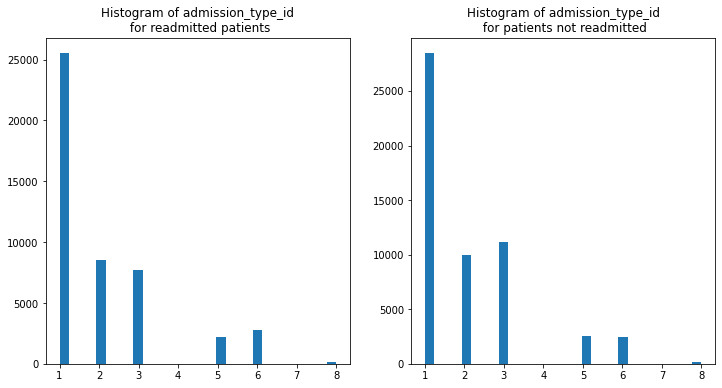

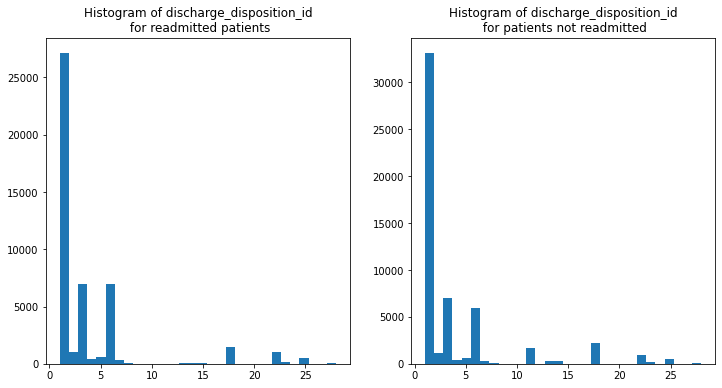

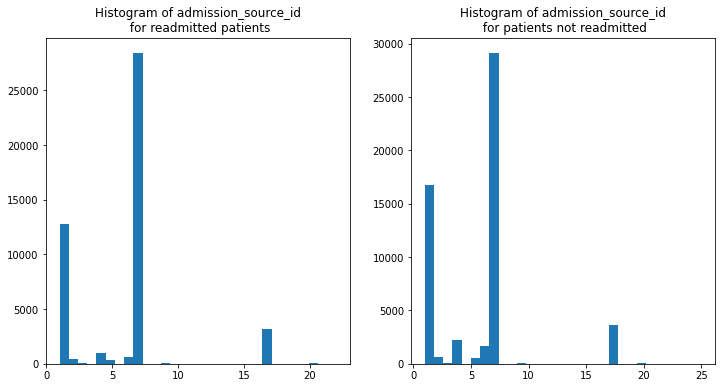

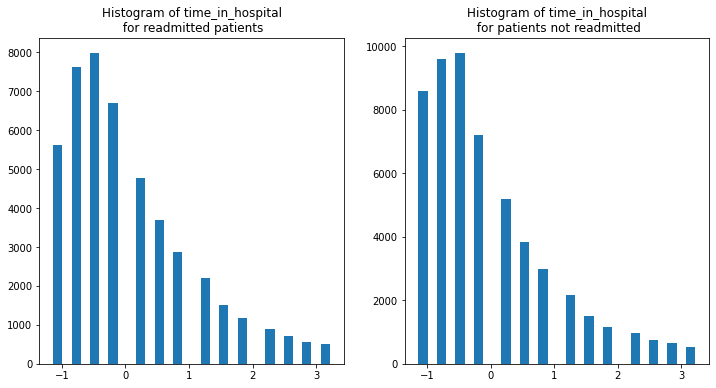

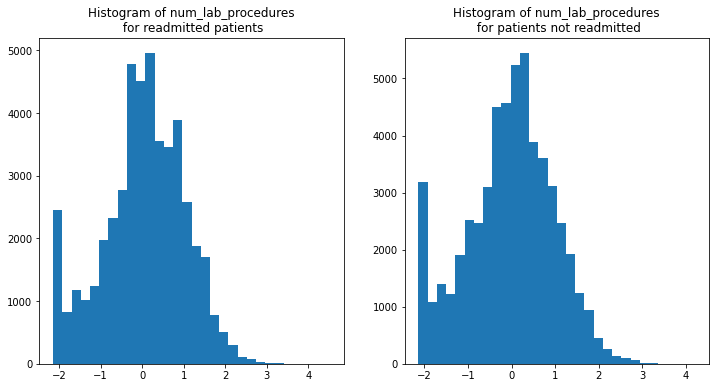

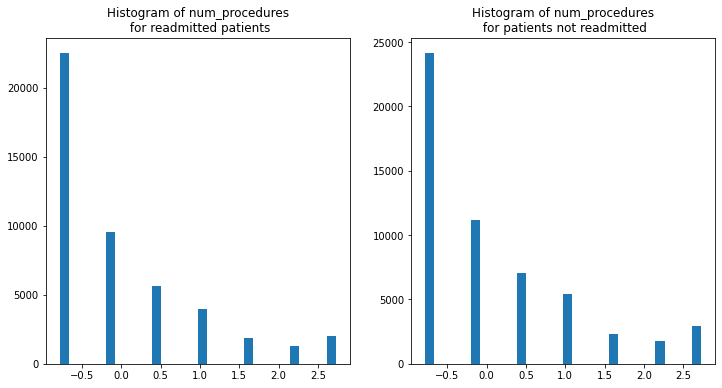

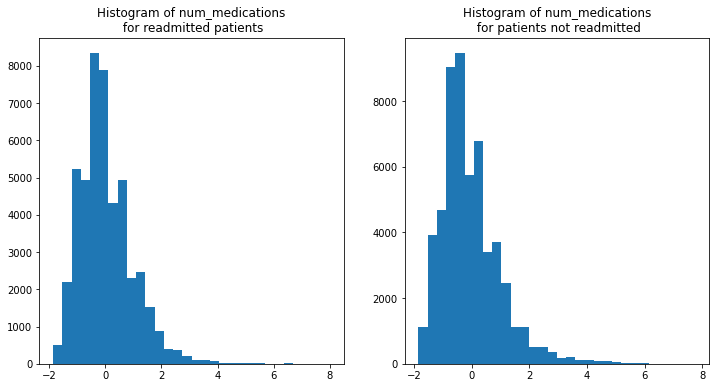

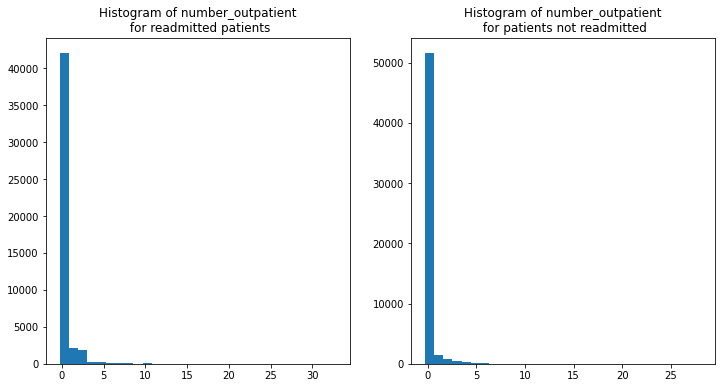

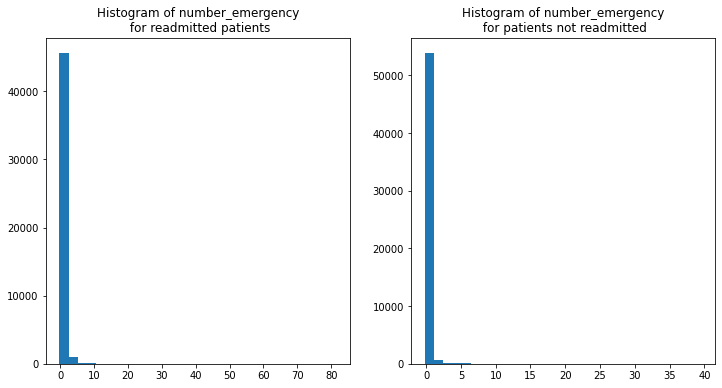

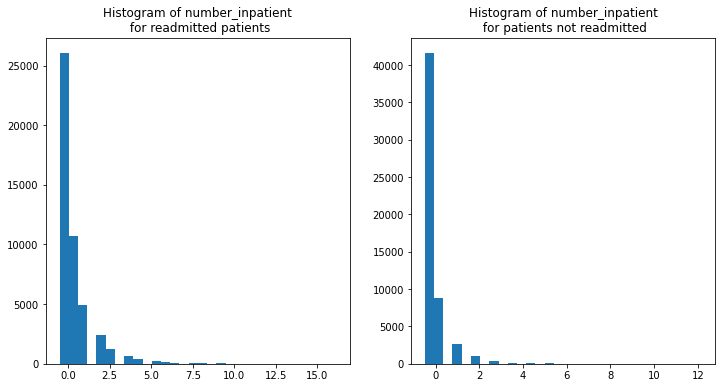

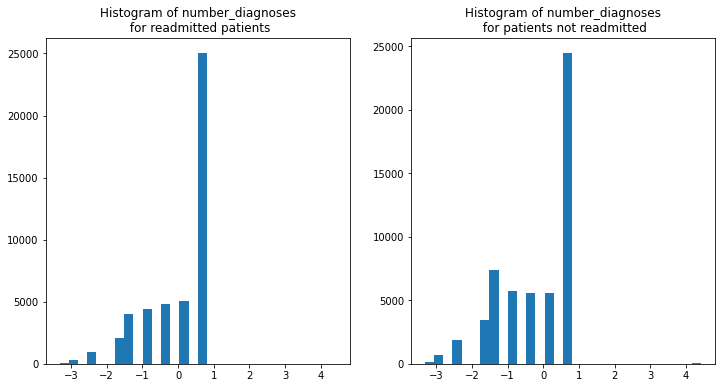

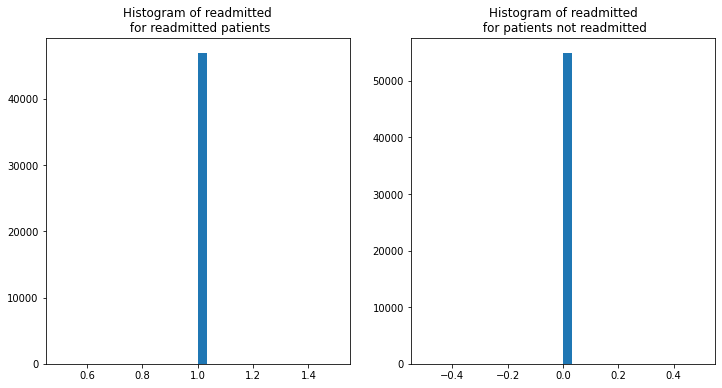

In [29]:
diabetes_hist(df)

In [30]:
df.columns
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,-1.137649,...,No,No,No,No,No,No,No,No,0,unknown
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,-0.467653,...,Up,No,No,No,No,No,Ch,Yes,1,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,-0.802651,...,No,No,No,No,No,No,No,Yes,0,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,-0.802651,...,Up,No,No,No,No,No,Ch,Yes,0,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,-1.137649,...,Steady,No,No,No,No,No,Ch,Yes,0,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,-0.467653,...,Down,No,No,No,No,No,Ch,Yes,1,Emergency
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,0.202343,...,Steady,No,No,No,No,No,No,Yes,0,Emergency
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,-1.137649,...,Down,No,No,No,No,No,Ch,Yes,0,Emergency
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,1.877333,...,Up,No,No,No,No,No,Ch,Yes,0,Urgent


In [93]:

x=df.loc[:,['number_inpatient','time_in_hospital','number_emergency','number_outpatient','number_diagnoses']]

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(x)

In [94]:
Y=df.loc[:,'readmitted']

In [95]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
X_train

array([[-0.50327619, -1.13764856, -0.21262018, -0.29146149, -1.77007826],
       [-0.50327619,  0.53734107, -0.21262018,  0.49764327, -1.25290571],
       [-0.50327619, -0.80265063, -0.21262018, -0.29146149,  0.81578448],
       ...,
       [ 1.08043429,  1.20733693, -0.21262018,  0.49764327,  0.81578448],
       [ 4.24785525, -0.46765271, -0.21262018, -0.29146149, -1.25290571],
       [-0.50327619, -1.13764856, -0.21262018, -0.29146149, -0.73573316]])

In [96]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)



LogisticRegression()

In [97]:
y_pred=logreg.predict(X_test)

In [98]:
#print(y_test.values.flatten())

In [99]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
c

array([[11049,  2660],
       [ 7066,  4667]])

In [100]:
acc=(11049+4667)/(11049+4667+7066+2660)
acc
print('Acuracy: %.3f' % acc)

Acuracy: 0.618


In [101]:
y_pred=set_readmit_class(y_pred)

y_pred = [int(i) for i in y_pred]


In [102]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred, pos_label=2)
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.500


In [103]:
import sklearn
sklearn.__version__

'0.24.1'

In [51]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [63]:
x=df.loc[:,['number_inpatient','time_in_hospital','number_emergency','number_outpatient','number_diagnoses']]
y=df.loc[:,'readmitted']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf1=DecisionTreeClassifier(random_state=0)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
pred=clf1.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6053769357754893

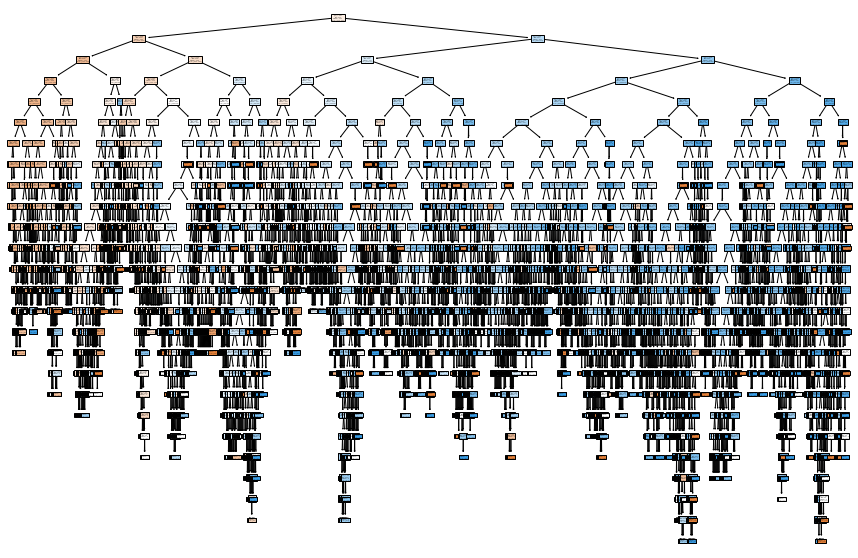

In [65]:
#Before Pruning
from sklearn import tree
%matplotlib inline
plt.figure(figsize=(15,10))
tree.plot_tree(clf1,filled=True)
plt.show()

In [105]:
path = clf1.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas


array([0.        , 0.        , 0.        , ..., 0.00330382, 0.00345218,
       0.02261868])

In [107]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is:{} with ccp_alpha:{}".format(
      clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is:1 with ccp_alpha:0.02261867591664063


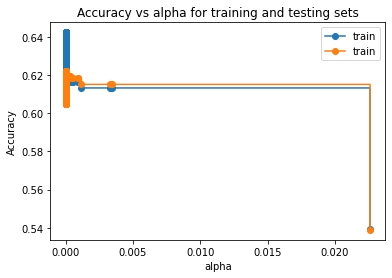

In [77]:
train_scores=[clf.score(x_train,y_train)for clf in clfs]
test_scores=[clf.score(x_test,y_test)for clf in clfs]
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='train',drawstyle='steps-post')
ax.legend()
plt.show()

In [111]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [112]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6183869192673532

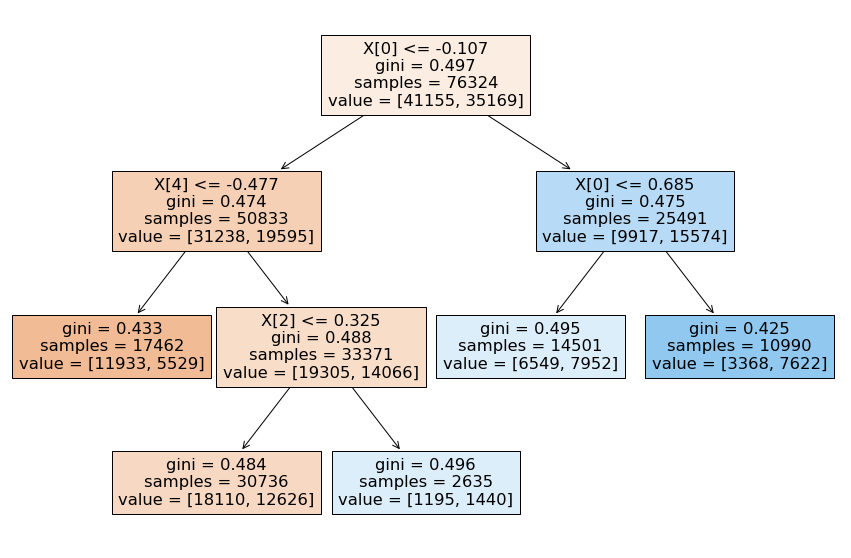

In [113]:
#After Pruning
from sklearn import tree
%matplotlib inline
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()